In [10]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import folium
from geopy.geocoders import Nominatim
from folium.plugins import MarkerCluster

df = pd.read_csv(r"C:\Users\ecoro\OneDrive\Documents\INST414_DataScienceTech\Assignment 4\archive\acs2015_county_data.csv", encoding='latin-1')

data = df[['State', 'County', 'TotalPop', 'Hispanic']].dropna()

scaler = StandardScaler()
data['Hispanic_normalized'] = scaler.fit_transform(data[['Hispanic']])

print(data.head())

     State   County  TotalPop  Hispanic  Hispanic_normalized
0  Alabama  Autauga     55221       2.6            -0.437226
1  Alabama  Baldwin    195121       4.5            -0.338465
2  Alabama  Barbour     26932       4.6            -0.333267
3  Alabama     Bibb     22604       2.2            -0.458018
4  Alabama   Blount     57710       8.6            -0.125349


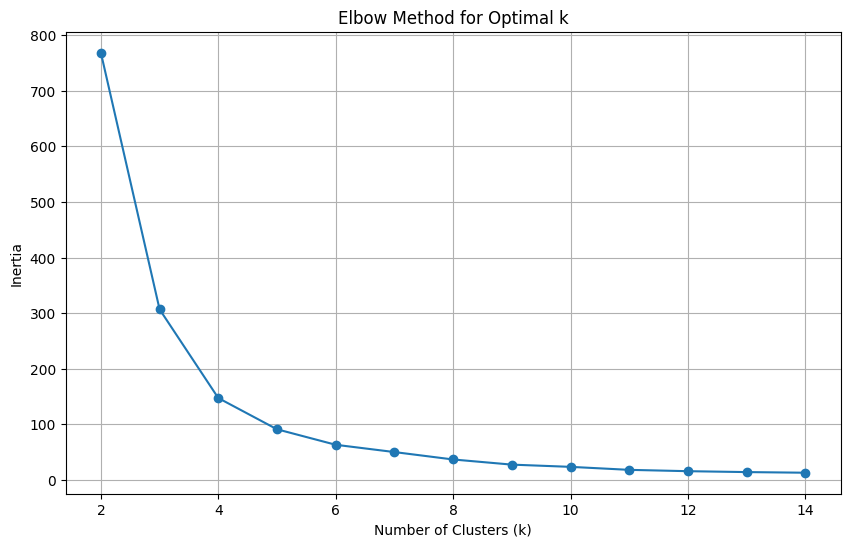

In [11]:
inertia_values = []
k_values = range(2, 15)  

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[['Hispanic_normalized']])
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [12]:
optimal_k = 4  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['Hispanic_normalized']])

print(data.head())

     State   County  TotalPop  Hispanic  Hispanic_normalized  cluster
0  Alabama  Autauga     55221       2.6            -0.437226        0
1  Alabama  Baldwin    195121       4.5            -0.338465        0
2  Alabama  Barbour     26932       4.6            -0.333267        0
3  Alabama     Bibb     22604       2.2            -0.458018        0
4  Alabama   Blount     57710       8.6            -0.125349        0


In [13]:
grouped = data.groupby('cluster')

for cluster, group in grouped:
    print(f"\nCluster {cluster}:")
    sample_counties = group.sample(n=min(5, len(group)))
    for _, row in sample_counties.iterrows():
        print(f"State: {row['State']} | County: {row['County']} | Hispanic: {row['Hispanic']:.2f}")



Cluster 0:
State: Texas | County: Shackelford | Hispanic: 10.80
State: Nebraska | County: Dixon | Hispanic: 11.70
State: New Hampshire | County: Sullivan | Hispanic: 1.40
State: North Dakota | County: Grant | Hispanic: 0.80
State: Maryland | County: St. Mary's | Hispanic: 4.50

Cluster 1:
State: Puerto Rico | County: Naranjito | Hispanic: 99.60
State: Puerto Rico | County: Maunabo | Hispanic: 99.90
State: Texas | County: Hudspeth | Hispanic: 78.40
State: Puerto Rico | County: RincÃ³n | Hispanic: 91.00
State: Puerto Rico | County: LoÃ­za | Hispanic: 99.90

Cluster 2:
State: Kansas | County: Seward | Hispanic: 58.30
State: Texas | County: Live Oak | Hispanic: 36.90
State: Texas | County: Loving | Hispanic: 35.00
State: Texas | County: Refugio | Hispanic: 49.20
State: Texas | County: Sterling | Hispanic: 45.80

Cluster 3:
State: Texas | County: McLennan | Hispanic: 24.80
State: Texas | County: Somervell | Hispanic: 19.20
State: Maryland | County: Montgomery | Hispanic: 18.30
State: Kansa